In [1]:
%load_ext lab_black

In [2]:
from datetime import date
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
df_btc = pd.read_csv("gemini_BTCUSD_day.csv", header=1)
df_eth = pd.read_csv("gemini_ETHUSD_day.csv", header=1)
df_ltc = pd.read_csv("gemini_LTCUSD_day.csv", header=1)
df_zec = pd.read_csv("gemini_ZECUSD_day.csv", header=1)
df_comp = pd.read_csv("HistoricalData_comp.csv")

In [4]:
def preprocess_gemini_data(df):
    df.columns = df.columns.str.lower().str.replace(" ", "_")
    df = df[["date", "symbol", "open", "high", "low", "close", "volume"]].copy()
    df.date = pd.to_datetime(df.date).dt.date
    df.index = df.date
    df = df.drop(columns="date")

    df["close_normalized"] = df.close / df.loc[date(2020, 1, 1)].close
    return df

In [5]:
df_btc = preprocess_gemini_data(df_btc)
df_eth = preprocess_gemini_data(df_eth)
df_ltc = preprocess_gemini_data(df_ltc)
df_zec = preprocess_gemini_data(df_zec)

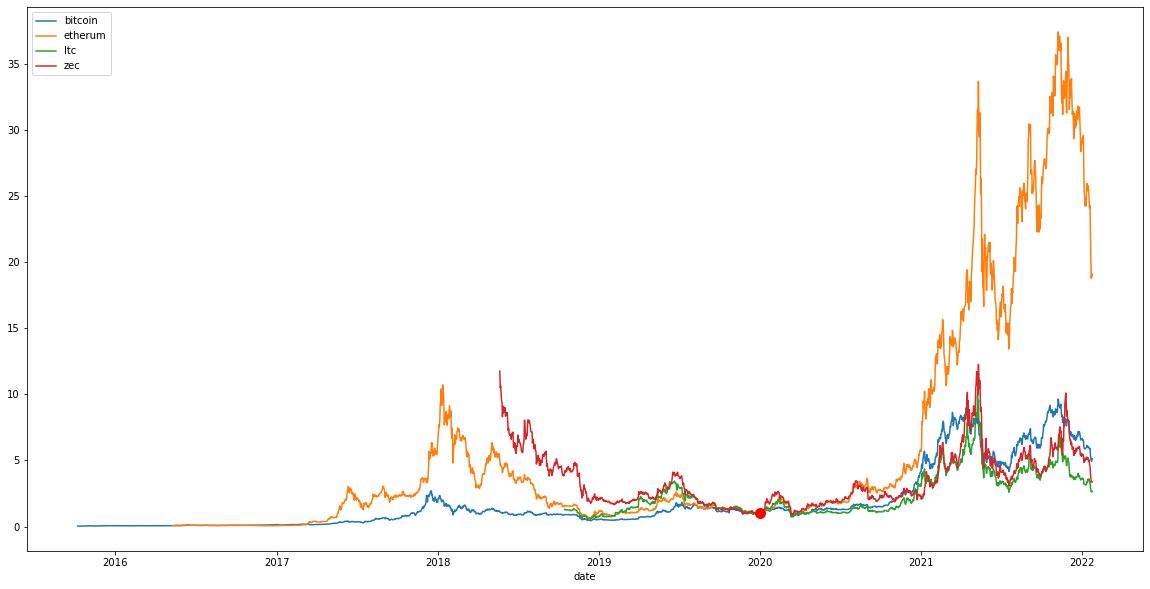

In [6]:
fig = plt.figure(figsize=(20, 10))
df_btc.close_normalized.plot(label="bitcoin")
df_eth.close_normalized.plot(label="etherum")
df_ltc.close_normalized.plot(label="ltc")
df_zec.close_normalized.plot(label="zec")

plt.plot(date(2020, 1, 1), 1, "ro", markersize=10)
plt.legend()
plt.show()

In [7]:
def preprocess_currency_data_to_series(currency, col_number):
    euro = currency.iloc[6:, [0, col_number]]
    euro.columns = ["date", "price"]
    euro.date = pd.to_datetime(euro.date, errors="coerce")
    euro.price = pd.to_numeric(euro.price, errors="coerce")
    euro.index = euro.date
    euro = euro.price.dropna()
    return euro


def preprocess_ns_data_to_series(df):
    s = df[["Date", "Open"]]
    s.columns = s.columns.str.lower()
    s.index = pd.to_datetime(s.date)
    s = s.open
    return s


def preprocess_ns_stockdata_to_series(df):
    s = df[["Date", "Open"]]
    s.columns = s.columns.str.lower()
    s.index = pd.to_datetime(s.date)
    s.open = pd.to_numeric(s.open.str[1:])
    s = s.open
    return s


def preprocess_gemini_data_to_series(df):
    return df.open

In [8]:
currency = pd.read_csv("FRB.csv")
sp500 = pd.read_csv("HistoricalData_spx.csv")
nasdaq = pd.read_csv("HistoricalData_comp.csv")
apple = pd.read_csv("HistoricalData_apple.csv")
gm = pd.read_csv("HistoricalData_GM.csv")

In [9]:
ana = pd.concat(
    [
        preprocess_currency_data_to_series(currency, 2).rename("euro"),
        preprocess_ns_data_to_series(sp500).rename("sp500"),
        preprocess_ns_data_to_series(nasdaq).rename("nsdq"),
        preprocess_ns_stockdata_to_series(apple).rename("apple"),
        preprocess_ns_stockdata_to_series(gm).rename("gm"),
        preprocess_gemini_data_to_series(df_btc).rename("btc"),
        preprocess_gemini_data_to_series(df_eth).rename("eth"),
        preprocess_gemini_data_to_series(df_ltc).rename("ltc"),
    ],
    axis=1,
)
ana = ana.dropna(axis=0)[1:].copy()

/opt/homebrew/Caskroom/miniforge/base/envs/pytorch/lib/python3.8/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [10]:
ana

,euro,sp500,nsdq,apple,gm,btc,eth,ltc
date,,,,,,,,
2018-10-17,1.1540,2811.67,7669.26,55.5750,32.06,6444.08,205.86,52.92
2018-10-18,1.1494,2802.00,7616.47,54.4650,31.71,6459.26,204.60,53.52
2018-10-19,1.1513,2775.66,7530.15,54.5150,30.72,6383.39,199.43,51.88
2018-10-22,1.1467,2773.94,7486.74,54.9475,31.45,6408.70,201.68,52.09
2018-10-23,1.1480,2721.03,7328.55,53.9575,30.94,6392.27,200.22,51.62
...,...,...,...,...,...,...,...,...
2022-01-14,1.1414,4637.99,14708.02,171.3400,61.10,42679.68,3270.05,138.53
2022-01-18,1.1336,4632.24,14681.83,171.5100,60.13,42052.76,3183.74,147.38
2022-01-19,1.1346,4588.03,14582.22,170.0000,59.31,41712.63,3099.15,137.08


In [11]:
for c in ana.columns:
    ana[c + "_nb"] = ana[c] / ana[c].iloc[0]
ana = ana.dropna(axis=0)

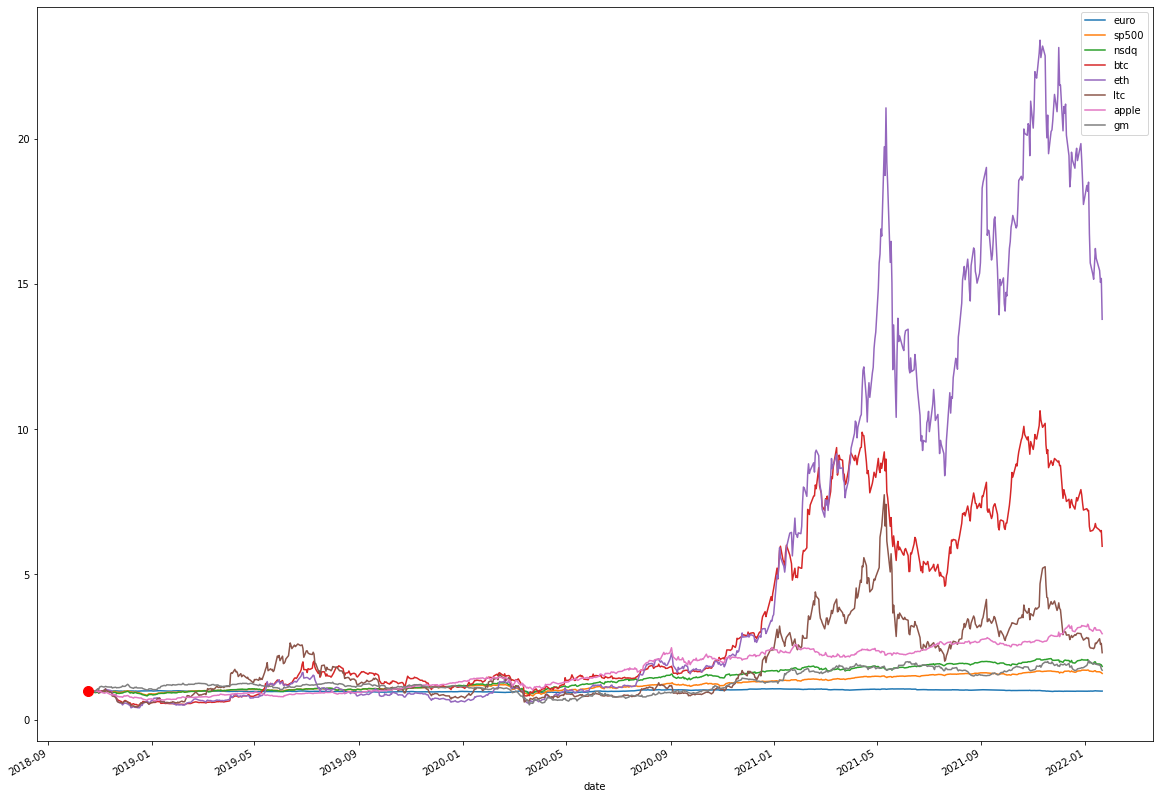

In [12]:
fig = plt.figure(figsize=(20, 15))
ana.euro_nb.plot(label="euro")
ana.sp500_nb.plot(label="sp500")
ana.nsdq_nb.plot(label="nsdq")
ana.btc_nb.plot(label="btc")
ana.eth_nb.plot(label="eth")
ana.ltc_nb.plot(label="ltc")
ana.apple_nb.plot(label="apple")
ana.gm_nb.plot(label="gm")

plt.plot(ana.index[0], 1, "ro", markersize=10)
plt.legend()
plt.show()

In [19]:
def get_today_x(ana):
    idx = np.random.choice(range(len(ana)))
    base = ana.iloc[idx, :8]
    s = (ana.iloc[-1, :8] / base) - 1
    s["base_date"] = base.name
    return s

In [15]:
sample = pd.concat([get_today_x(ana) for _ in range(10000)], axis=1).transpose()
sample.index = sample.base_date

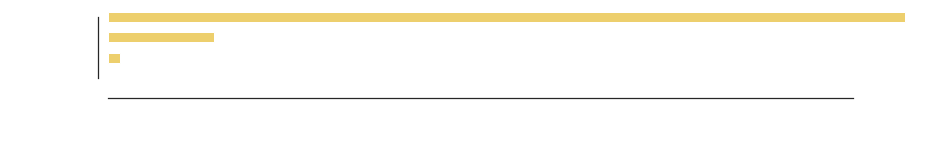

In [16]:
import seaborn as sns

sns.set_theme(style="white")

fig = plt.figure(figsize=(15, 1.5))
plot_data = sample[["euro", "apple", "btc", "eth"]].var()
plot_data.index = ["Euro", "Apple-Stock", "Bitcoin", "Ether"]
plot_data.plot(kind="barh", width=0.5, color="#edcf6d", alpha=1, align="center")
# dd = sample[["euro", "apple", "btc", "eth"]].var()

# plt.barh(dd.index, dd)
sns.despine(offset=10, trim=True)
plt.xlabel(
    "Variance of return: Asset bought between Oct.18 - Jan.22 (uniform distribution) and sold in Jan 22.",
    fontsize=15,
    color="white",
)
plt.xticks(fontsize=15, color="white")
plt.yticks(fontsize=15, color="white")
plt.show()

fig.savefig("plot1.png", transparent=True, bbox_inches="tight")

In [36]:
def get_return_10(ana):
    idx = np.random.choice(range(len(ana) - 10))
    base = ana.iloc[idx, :8]
    s = (ana.iloc[idx + 10, :8] / base) - 1
    s["base_date"] = base.name
    return s

In [37]:
sample2 = pd.concat([get_return_10(ana) for _ in range(10000)], axis=1).transpose()
sample2.index = sample2.base_date

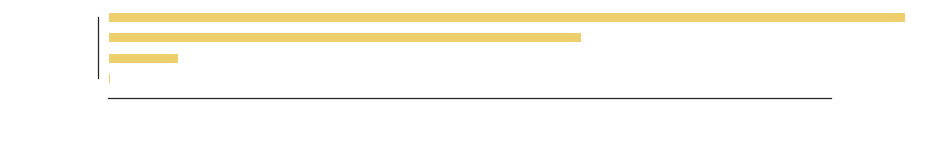

In [38]:
import seaborn as sns

sns.set_theme(style="white")

fig = plt.figure(figsize=(15, 1.5))
plot_data = sample2[["euro", "apple", "btc", "eth"]].var()
plot_data.index = ["Euro", "Apple-Stock", "Bitcoin", "Ether"]
plot_data.plot(kind="barh", width=0.5, color="#edcf6d", alpha=1, align="center")

sns.despine(offset=10, trim=True)
plt.xlabel(
    r"Variance of 10-day-return* -- Buy asset between Oct.18 - Jan.22 (uniform distribution) and sell 10 days after.",
    fontsize=15,
    color="white",
)
plt.xticks(fontsize=15, color="white")
plt.yticks(fontsize=15, color="white")
plt.show()

fig.savefig("plot_var2.png", transparent=True, bbox_inches="tight")